In [1]:
import gym
import numpy as np

env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

In [42]:
s, info = env.reset()

samatrix = np.zeros([16, 4])
gamma = 0.90
alpha = 0.025
epsilon = 1

nep = 100000
n = nep
c = 10
k = nep/c
sumr = 0
rrec = []

while nep > 0:
    
    if np.random.rand() < epsilon:
        options = np.where(samatrix[s] != max(samatrix[s]))[0]
        if len(options) > 0:
            act = np.random.randint(0, len(options))
            act = options[act]
            s1, r, terminated, truncated, info = env.step(act)
        else:
            act = np.random.randint(0, 4)
            s1, r, terminated, truncated, info = env.step(act)
    else:
        optoption = np.where(samatrix[s] == max(samatrix[s]))[0]
        if len(optoption) > 0:
            act = optoption[0]
            s1, r, terminated, truncated, info = env.step(act)
        else:
            act = np.random.randint(0, 4)
            s1, r, terminated, truncated, info = env.step(act)


    maxqs1 = max(samatrix[s1])
    qs = samatrix[s][act]
    samatrix[s][act] = qs + alpha*(r + gamma*maxqs1 - qs)
    sumr +=  r

    if terminated or truncated:
        s, info = env.reset()
        nep -= 1
        k += 1
        if  nep%k == 0:
            epsilon -= 1/c
        rrec.append(sumr)
        sumr = 0

    else:
        s = s1

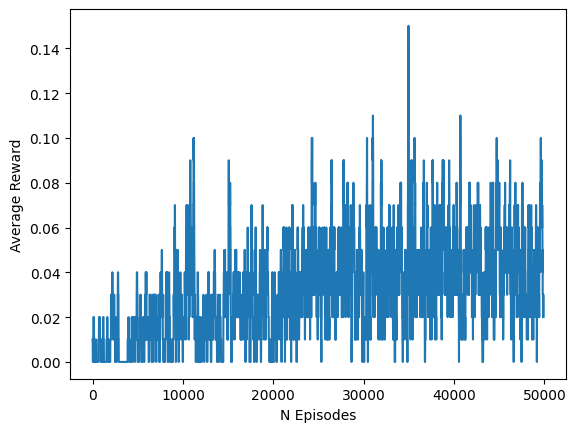

In [ ]:
import matplotlib.pyplot as plt

avgr = []
for i in range(0, n-100):
    avgr.append(sum(rrec[i:i+100])/100)

fig = plt.figure()
ax = fig.gca()
ax.plot(avgr)
ax.set_xlabel("N Episodes")
ax.set_ylabel("Average Reward")
plt.show()